In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv(r"/content/Final_Commentlevel_SentimentDistribution_Real_19.csv")

In [7]:
data.columns

Index(['Unnamed: 0', 'Comment', 'Sentiment of the four models', 'Score',
       'Overall voted sentiment',
       'Overall Sentiment over comment from sentences',
       'Sentiment from models', 'Sentiment from models score',
       'Sentiment over comment from models', 'Score for entire comment',
       'Post'],
      dtype='object')

In [8]:
data.head(2)

,Unnamed: 0,Comment,Sentiment of the four models,Score,Overall voted sentiment,Overall Sentiment over comment from sentences,Sentiment from models,Sentiment from models score,Sentiment over comment from models,Score for entire comment,Post
0,0,Dit is echt een schande. In deze tijd van woni...,"[[-1, -1, -1, -1], [1, 1, 1, -1], [0, -1, -1, ...","[[0.9995989203453064, 0.9998968839645386, 0.93...","[-1, 1, -1, 0]",-1,"[-1, -1, -1, -1]","[0.9990813732147217, 0.9997785687446594, 0.920...",-1,"[0.9990813732147217, 0.9997785687446594, 0.920...",BUURTWONING | In Aalsmeer is sinds kort een Bu...
1,1,Waarom is Participe gewoon niet langer open. E...,"[[-1, 0, -1, -1], [1, 1, -1, -1], [1, 1, 1, 0]...","[[0.9819625020027161, [0.7508822083473206, 0.2...","[-1, 0, 1, 0]",0,"[1, 1, -1, 0]","[0.99921715259552, 0.9998637437820435, 0.56990...",1,"[0.99921715259552, 0.9998637437820435, 0.56990...",BUURTWONING | In Aalsmeer is sinds kort een Bu...


In [56]:
all_sentiments = sorted(set(data['Overall Sentiment over comment from sentences'].value_counts().index).union(set(data['Sentiment over comment from models'].value_counts().index)))

sentiment_distribution_sentencelevel = data['Overall Sentiment over comment from sentences'].value_counts().reindex(all_sentiments,fill_value=0)
sentiment_distribution_commentlevel = data['Sentiment over comment from models'].value_counts().reindex(all_sentiments,fill_value=0)

In [57]:
sentiment_distribution_commentlevel,sentiment_distribution_sentencelevel

(Sentiment over comment from models
 -1    1722
  0    1167
  1    1433
  2       0
 Name: count, dtype: int64,
 Overall Sentiment over comment from sentences
 -1    1400
  0    1523
  1    1334
  2      65
 Name: count, dtype: int64)

<Figure size 800x600 with 0 Axes>

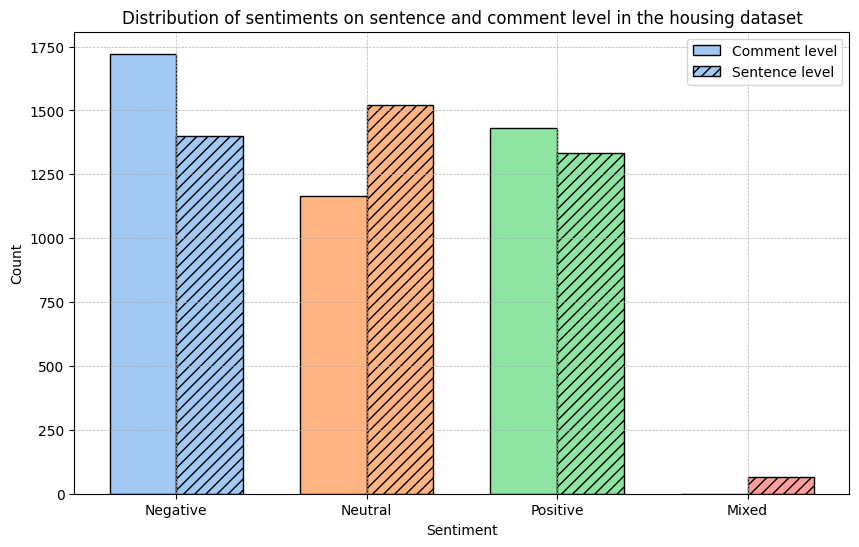

In [61]:
# Plotting the distribution
colours = sns.color_palette("pastel",12)
plt.figure(figsize=(8, 6))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(sentiment_distribution_commentlevel))

bar1 = ax.bar(index, sentiment_distribution_commentlevel, bar_width, label='Comment level', color=colours[:3],edgecolor='black')
bar2 = ax.bar(index + bar_width, sentiment_distribution_sentencelevel, bar_width, label='Sentence level', color=colours[:4],edgecolor='black',hatch='///')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of sentiments on sentence and comment level in the housing dataset')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sentiment_distribution_commentlevel.index)
ax.legend()

# Map sentiment values to labels
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive', 2: 'Mixed'}
all_labels = [sentiment_labels[sentiment] for sentiment in all_sentiments]
ax.set_xticklabels(all_labels)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [75]:
#Post Level sentiments

groups = pd.DataFrame(data.groupby("Post")['Overall Sentiment over comment from sentences'].apply(list).reset_index())
groups1 = pd.DataFrame(data.groupby("Post")['Sentiment over comment from models'].apply(list).reset_index())

groups = pd.merge(groups, groups1, on='Post', how='inner')

In [76]:
groups

,Post,Overall Sentiment over comment from sentences,Sentiment over comment from models
0,!! Elk jaar overlijden er in Nederland naar sc...,[-1],[-1]
1,"""Mijn man en ik kwamen hier 12 jaar geleden wo...","[-1, 0, 2]","[-1, -1, 1]"
2,"""Onze medewerkers bouwen iedere dag met liefde...",[-1],[-1]
3,"""Weet je, negen van de tien keer gebeurt er ni...","[-1, -1]","[-1, -1]"
4,#WERK | Wil jij meewerken aan de toekomst van ...,[0],[0]
...,...,...,...
1055,Zoekt u een kleinere woning omdat uw kinderen ...,[0],[-1]
1056,Zorg jij er voor dat jouw gegevens (06-nummer ...,"[0, 1, 1, 0]","[0, 1, 1, 0]"
1057,Zwolse filmmakers zijn de afgelopen tijd druk ...,[0],[1]
1058,https://www.prowonen.nl/over-prowonen/nieuws-e...,[1],[1]


In [77]:
from collections import Counter
def sentiment_over_comment_majority(sentiment):
    if len(sentiment) == 1:
        return sentiment[0]

    # Use Counter to count occurrences of each sentiment
    counts = Counter(sentiment)
    most_common = max(counts.values())
    max_labels = [label for label, count in counts.items() if count == most_common]

    if len(sentiment) == 2:
        if sentiment[0] != sentiment[1]:
            return 0  # Return 0 if there are exactly two sentiments and they are different
        else:
            return sentiment[0]  # Return the sentiment if both are the same

    elif len(sentiment) == 3:
        if all(x == sentiment[0] for x in sentiment):
            return sentiment[0]  # Return any sentiment if all three are the same

        label_counts = Counter(sentiment)

        if 3 in label_counts.values():
            return [label for label, count in label_counts.items() if count == 3][0]  # Return sentiment with count 3

        if 2 in label_counts.values():
            return [label for label, count in label_counts.items() if count == 2][0]  # Return sentiment with count 2

        return 2 # Return 0 for mixed sentiment when no clear majority

    else:
        counts = Counter(sentiment)
        most_common = max(counts.values())
        max_labels = [label for label, count in counts.items() if count == most_common]

        if len(max_labels) == 1:
            return max_labels[0]  # Return the sentiment if there is a clear majority

        elif len(max_labels) == 2 and counts[max_labels[0]] == counts[max_labels[1]]:
            return 0  # Return 0 for mixed sentiment when two sentiments have the same count

        else:
            return 2  # Return 0 for mixed sentiment when there's no clear majority

In [79]:
groups["Post from sentences"]=groups["Overall Sentiment over comment from sentences"].apply(lambda x:sentiment_over_comment_majority(x))
groups["Post from comments"]=groups["Sentiment over comment from models"].apply(lambda x:sentiment_over_comment_majority(x))

In [80]:
groups

,Post,Overall Sentiment over comment from sentences,Sentiment over comment from models,Post from sentences,Post from comments
0,!! Elk jaar overlijden er in Nederland naar sc...,[-1],[-1],-1,-1
1,"""Mijn man en ik kwamen hier 12 jaar geleden wo...","[-1, 0, 2]","[-1, -1, 1]",2,-1
2,"""Onze medewerkers bouwen iedere dag met liefde...",[-1],[-1],-1,-1
3,"""Weet je, negen van de tien keer gebeurt er ni...","[-1, -1]","[-1, -1]",-1,-1
4,#WERK | Wil jij meewerken aan de toekomst van ...,[0],[0],0,0
...,...,...,...,...,...
1055,Zoekt u een kleinere woning omdat uw kinderen ...,[0],[-1],0,-1
1056,Zorg jij er voor dat jouw gegevens (06-nummer ...,"[0, 1, 1, 0]","[0, 1, 1, 0]",0,0
1057,Zwolse filmmakers zijn de afgelopen tijd druk ...,[0],[1],0,1
1058,https://www.prowonen.nl/over-prowonen/nieuws-e...,[1],[1],1,1


<Figure size 800x600 with 0 Axes>

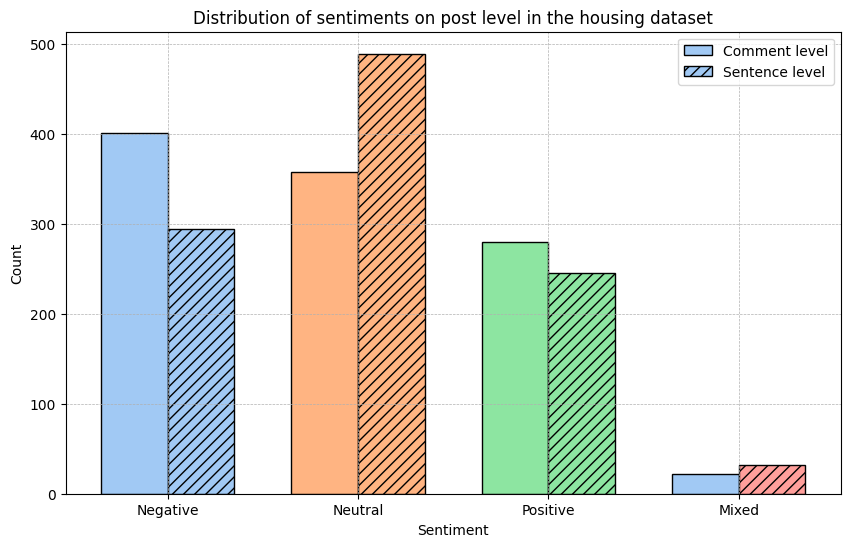

In [82]:
all_sentiments = sorted(set(groups['Post from sentences'].value_counts().index).union(set(groups['Post from comments'].value_counts().index)))

sentiment_distribution_sentencelevel = groups['Post from sentences'].value_counts().reindex(all_sentiments,fill_value=0)
sentiment_distribution_commentlevel = groups['Post from comments'].value_counts().reindex(all_sentiments,fill_value=0)

# Plotting the distribution
colours = sns.color_palette("pastel",12)
plt.figure(figsize=(8, 6))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(sentiment_distribution_commentlevel))

bar1 = ax.bar(index, sentiment_distribution_commentlevel, bar_width, label='Comment level', color=colours[:3],edgecolor='black')
bar2 = ax.bar(index + bar_width, sentiment_distribution_sentencelevel, bar_width, label='Sentence level', color=colours[:4],edgecolor='black',hatch='///')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of sentiments on post level in the housing dataset')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sentiment_distribution_commentlevel.index)
ax.legend()

# Map sentiment values to labels
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive', 2: 'Mixed'}
all_labels = [sentiment_labels[sentiment] for sentiment in all_sentiments]
ax.set_xticklabels(all_labels)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
